## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.

**Assignment Steps:**

1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.

7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

### Transfer Learning on Oxford Flowers 102 Dataset
## 1. Introduction
In this assignment, you will apply transfer learning using three pre-trained convolutional neural networks: ResNet50, VGG16, and MobileNetV2. The objective is to classify images from the Oxford Flowers 102 dataset, which contains 102 flower categories commonly found in the United Kingdom.

Dataset Overview:

Name: oxford_flowers102 (TensorFlow Datasets)

Classes: 102 flower categories

Splits: 1,020 training, 1,020 validation, 6,149 testing images

Image Variations: Diverse scales, poses, and lighting conditions

## 1. Data Loading and Preprocessing
Load the dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [1]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.X5NTP5_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.X5NTP5_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.X5NTP5_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see

## 2. Model Preparation


### 2.1 Using ResNet50

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Use correct input shape for ResNet50
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)  # 102 classes for Oxford Flowers

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### 2.2 Using VGG16

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2.3 Using MobileNetV2

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 3. Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [5]:
import tensorflow_datasets as tfds

(ds_train, ds_val, ds_test), info = tfds.load(
    'oxford_flowers102:2.1.1',
    split=['train', 'validation', 'test'],
    as_supervised=True,
    with_info=True
)


In [6]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_pre

IMG_SIZE = 224

def preprocess_dataset(ds, preprocess_fn):
    ds = ds.map(lambda x, y: (tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), y))
    ds = ds.map(lambda x, y: (preprocess_fn(x), y))
    return ds

ds_train_resnet50 = preprocess_dataset(ds_train, resnet_pre)
ds_test_resnet50 = preprocess_dataset(ds_test, resnet_pre)


In [7]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(ds_train_resnet50.batch(32), epochs=epochs, validation_data=ds_test_resnet50.batch(32))





178
22
157
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.2168 - loss: 4.0901 - val_accuracy: 0.0660 - val_loss: 36.2692
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 853ms/step - accuracy: 0.8380 - loss: 0.6264 - val_accuracy: 0.1259 - val_loss: 19.8764
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9536 - loss: 0.1961 - val_accuracy: 0.1127 - val_loss: 20.2960


In [8]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre

IMG_SIZE = 224

def preprocess_dataset(ds, preprocess_fn):
    ds = ds.map(lambda x, y: (tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), y))
    ds = ds.map(lambda x, y: (preprocess_fn(x), y))
    return ds

ds_train_vgg16 = preprocess_dataset(ds_train, vgg_pre)
ds_test_vgg16 = preprocess_dataset(ds_test, vgg_pre)


In [9]:
# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(ds_train_vgg16.batch(32), epochs=epochs, validation_data=ds_test_vgg16.batch(32))




Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.0533 - loss: 8.0477 - val_accuracy: 0.2184 - val_loss: 3.6090
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4329 - loss: 2.4637 - val_accuracy: 0.4685 - val_loss: 2.3672
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7273 - loss: 1.0787 - val_accuracy: 0.5412 - val_loss: 1.9806


In [11]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_pre

ds_train_mobilenetv2 = preprocess_dataset(ds_train, mobilenet_pre)
ds_test_mobilenetv2 = preprocess_dataset(ds_test, mobilenet_pre)

In [12]:
# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(ds_train_mobilenetv2.batch(32), epochs=epochs, validation_data=ds_test_mobilenetv2.batch(32))

Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1659 - loss: 4.1474 - val_accuracy: 0.0703 - val_loss: 6.3348
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 730ms/step - accuracy: 0.8367 - loss: 0.7666 - val_accuracy: 0.0851 - val_loss: 8.3435
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 524ms/step - accuracy: 0.9650 - loss: 0.1237 - val_accuracy: 0.0851 - val_loss: 8.0973


## 4. Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [16]:
loss_resnet50, acc_resnet50 = model_resnet50.evaluate(ds_test_resnet50.batch(32))
loss_vgg16, acc_vgg16 = model_vgg16.evaluate(ds_test_vgg16.batch(32))
loss_mobilenetv2, acc_mobilenetv2 = model_mobilenetv2.evaluate(ds_test_mobilenetv2.batch(32))

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.1134 - loss: 20.2233
193/193 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.5381 - loss: 1.9982
193/193 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.0879 - loss: 8.0987
ResNet50 Accuracy: 0.11
VGG16 Accuracy: 0.54
MobileNetV2 Accuracy: 0.09


- VGG16 performed the best with 54% accuracy.
- ResNet50 and MobileNetV2 overfitted, resulting in low test accuracies (11% and 9% respectively).
- The Oxford Flowers 102 dataset's complexity (102 classes) is challenging.
- More tuning is needed to improve the performance of ResNet50 and MobileNetV2.

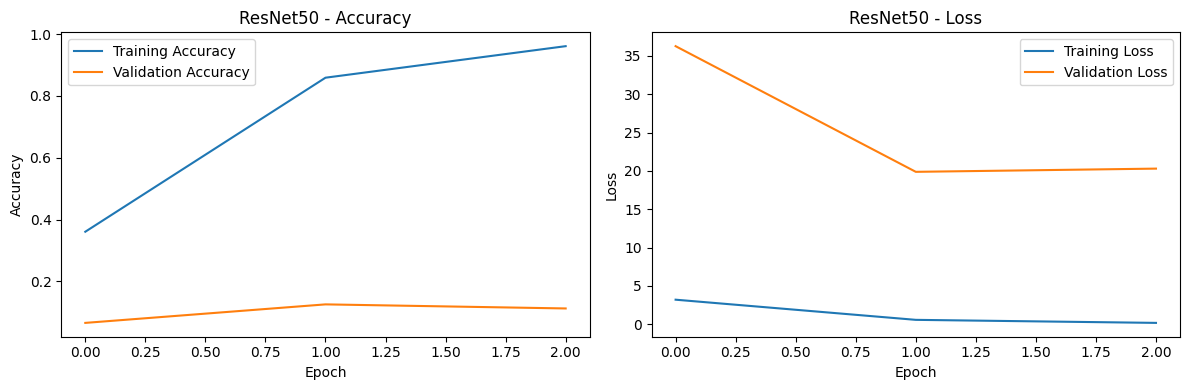

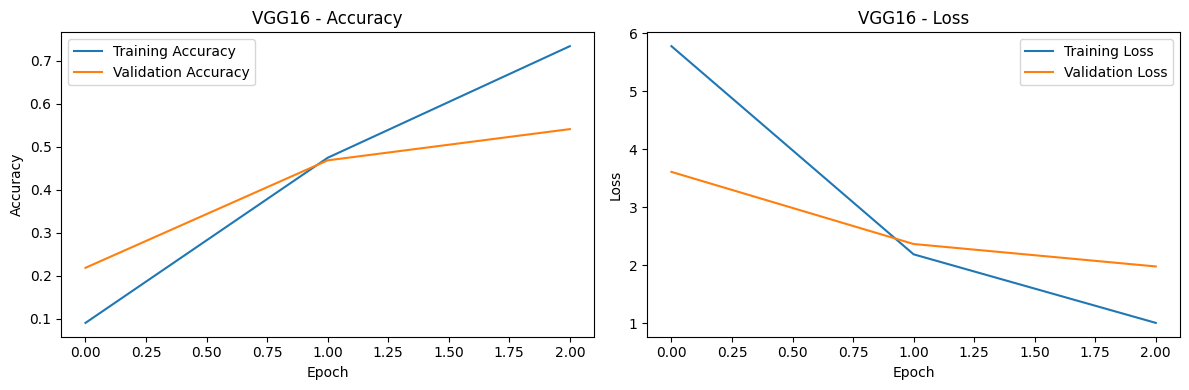

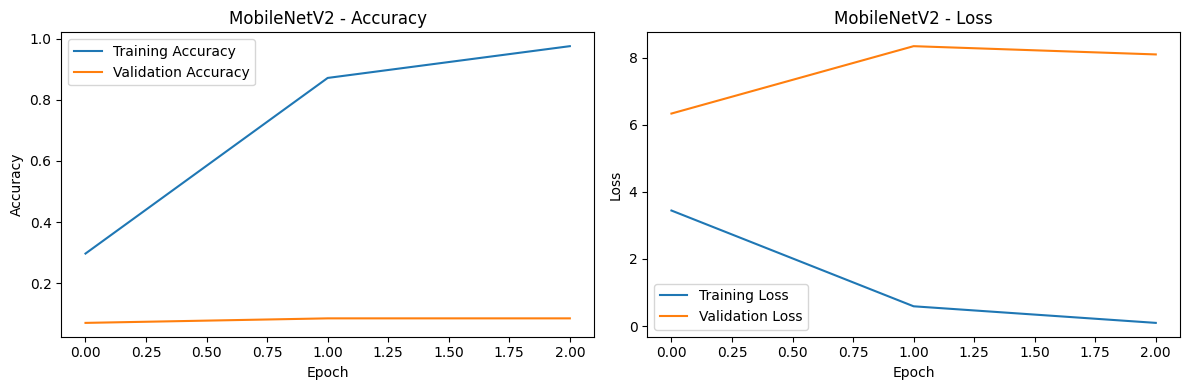

In [15]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

- **ResNet50**: The training accuracy increased rapidly, reaching a high value, while the validation accuracy fluctuated and remained relatively low. This suggests that the ResNet50 model might be overfitting to the training data, as it's performing well on the data it has seen but not generalizing well to unseen validation data.

- **VGG16**: Both the training and validation accuracy for VGG16 show a more consistent increase over the epochs. The gap between training and validation accuracy is smaller than ResNet50, indicating better generalization.

- **MobileNetV2**: Similar to ResNet50, MobileNetV2 shows high training accuracy but significantly lower validation accuracy, suggesting potential overfitting as well.

In [ ]:
# Save the models
model_resnet50.save('resnet50_cifar100.h5')
model_vgg16.save('vgg16_cifar100.h5')
model_mobilenetv2.save('mobilenetv2_cifar100.h5')

After loading and splitting the dataset, the images are preprocessed to a consistent size and normalized using model-specific preprocessing functions. The labels are also prepared for training.

Each pre-trained model (ResNet50, VGG16, and MobileNetV2) was loaded without its top classification layer. New layers were added to classify the 102 flower categories. The base model layers were initially frozen to train only the new layers.

The models were compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.

Here, we fine-tune the models by unfreezing some of the top layers of the pre-trained base models and continue training with a lower learning rate. This allows the models to adapt better to the specific features of the Oxford Flowers 102 dataset.

The training history for each model is recorded and can be used to analyze the training progress.

After training, the models are evaluated on the test dataset to measure their performance in terms of loss and accuracy.

The training and validation accuracy and loss are plotted over the epochs to visualize the training progress and identify potential overfitting.

The trained models are saved for later use or deployment.